In [ ]:
import torch 
import torch.nn as nn 
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
input_size = 784 #28x28
hidden_size = 500
num_classes = 10
num_epochs = 2 
batch_size = 100
Learning_rate = 0.001

In [ ]:
#MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data',train=True,transform = transforms.ToTensor(),download= True)
test_dataset = torchvision.datasets.MNIST(root='./data',train=False,transform = transforms.ToTensor(),download= False)

In [ ]:
#Data loader 
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size = batch_size , shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset)

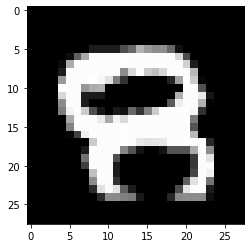

In [ ]:
#take an example 
example= iter(train_loader)   #object
example_x , example_y = example.next()   #data __item__ of the object   
plt.imshow(example_x[0][0],cmap='gray')

In [ ]:
#Neural Network Model
class NeuralNetwork(nn.Module):
  def __init__(self, input_size , hidden_size , num_classes):
    super().__init__()
    self.linear1 = nn.Linear(input_size , hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size , num_classes)
  def forward(self, x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    return out

In [ ]:
model = NeuralNetwork(input_size , hidden_size , num_classes)

In [ ]:
#Loss and Optimizer config
Loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters() , lr = Learning_rate)

In [ ]:
#Training Loop
for epoch in range(num_epochs):
   for i , (images,labels) in enumerate(train_loader):
      images = images.view(-1,28*28) # origin shape: [100, 1, 28, 28]   # resized: [100, 784]    NN will be feeded raw by raw   
      #forward
      output = model(images)
      loss = Loss(output,labels)
      #backward 
      optimizer.zero_grad() #initialise the dw on zero every step
      loss.backward()      #calculate the gradient of the loss 
      optimizer.step()     #update weight
      if (i+1)%100 ==0:
        print(f'epoch {epoch+1} / {num_epochs}  ,   step {i+1}/{len(train_loader)}     ,    loss {loss.item():.4f}')

epoch 1 / 2  ,   step 100/600     ,    loss 0.2936
epoch 1 / 2  ,   step 200/600     ,    loss 0.1955
epoch 1 / 2  ,   step 300/600     ,    loss 0.2903
epoch 1 / 2  ,   step 400/600     ,    loss 0.1395
epoch 1 / 2  ,   step 500/600     ,    loss 0.1294
epoch 1 / 2  ,   step 600/600     ,    loss 0.2020
epoch 2 / 2  ,   step 100/600     ,    loss 0.0654
epoch 2 / 2  ,   step 200/600     ,    loss 0.0755
epoch 2 / 2  ,   step 300/600     ,    loss 0.0900
epoch 2 / 2  ,   step 400/600     ,    loss 0.0518
epoch 2 / 2  ,   step 500/600     ,    loss 0.1381
epoch 2 / 2  ,   step 600/600     ,    loss 0.0933


In [ ]:
y_hat=[]
y_true=[]
y_predicted=[]
j=0
with torch.no_grad():
  for i,(images,y) in enumerate(test_loader):
    y_hat.append(torch.max(model(images.view(-1,28*28)),1))
    y_true.append(y.numpy())
    y_predicted.append((y_hat[i][1]).numpy())
  for i in range(len(y_true)):
    if y_predicted[i]-y_true[i] != 0: 
      j+=1

In [ ]:
print(f'number of wrong predictions is: {j}')
print(f'accuracy = {311/len(y_true)}')

number of wrong predictions is: 311
accuracy = 0.0311
